# Ic

0.001


Text(0, 0.5, 'Y')

/usr/local/lib64/python3.11/site-packages/matplotlib/quiver.py:695: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib64/python3.11/site-packages/matplotlib/quiver.py:695: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


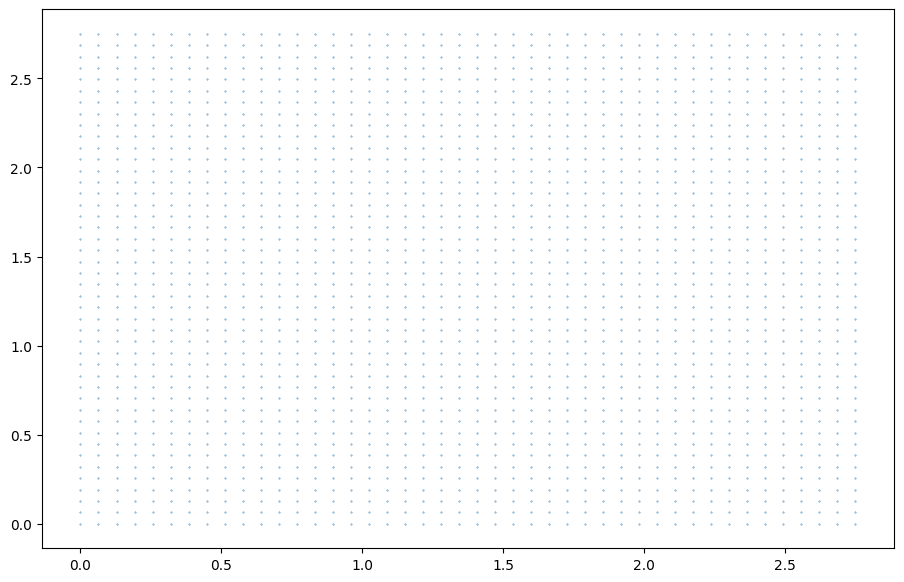

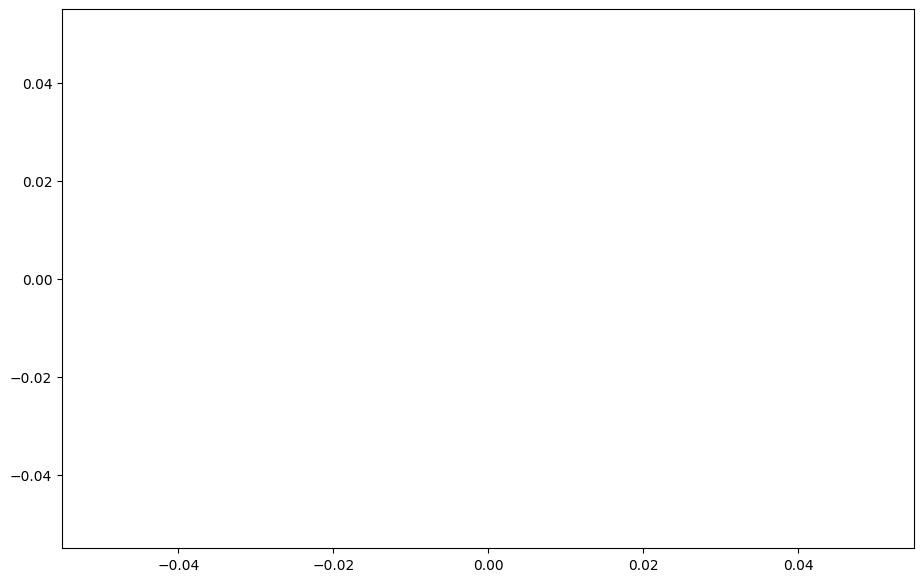

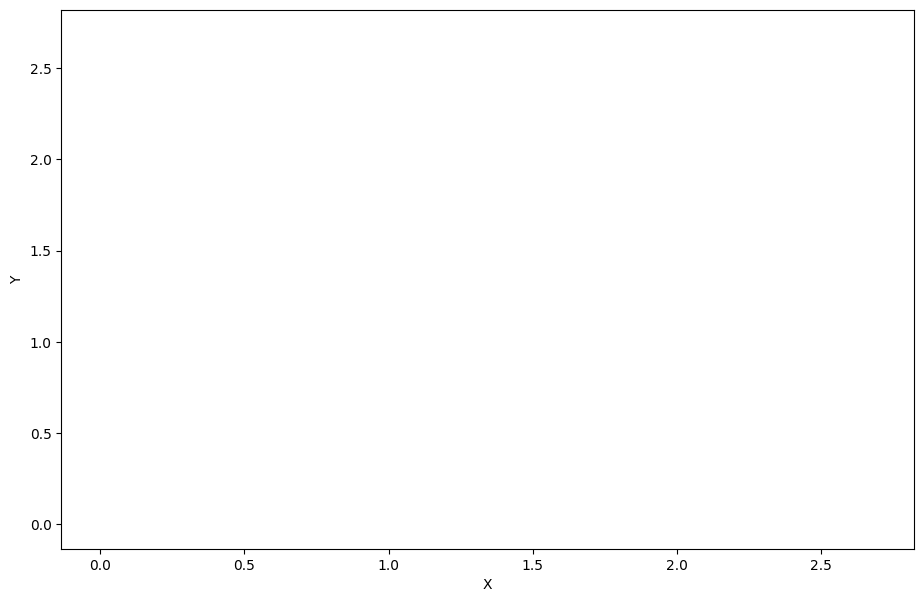

In [ ]:
'''
Created on Fri Mar  7 13:55:11 2025
Modified on Sun Mar 9 11:52:20 2025 
@author: latifa & Abeer 
'''
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
############### Initial Conditions ######################
g = 0  # gravity constant
n = 40
h = 0.75 #0.01  # smoothing length
Umax = 1
c = 10*Umax  # Speed of sound in water
gamma = 7
height = 2 #2
width = 2 #2
k = 50 #100 #75
v = np.zeros((n+4,n+4,2))
rho_0 = np.ones((n+4, n+4))
P_0 = rho_0.copy() * c*c/gamma
p = P_0.copy() * 0
C_cfl = 1.15
dt = C_cfl * h / c  # delta time from CFL condition
no_of_layers = 2
rho_init = 1  # constant rho
mu = 0.0010016  # at temp 20
nu = mu / rho_init  # kinematic viscosity
V_in_lam = 0
s_coordn = np.zeros(((n+4)* (n+4), 2))
#BCs:
velocity_of_lid_U = 1
v0 = np.zeros((n+4, n+4))
u0 = np.zeros((n+4, n+4))

v[:,:,0] = u0.copy()
v[:,:,1] = v0.copy()

f_v = np.zeros((n+4, n+4))

f_v[0, :] = 1
f_v[1, :] = 1

f_v[-2,:] = 1
f_v[-1,:] = 1

f_v[:,-2] = 1
f_v[:,-1] = 1

f_v[:, 0] = 1
f_v[:, 1] = 1

fg = -g * np.array([0, 1])  # gravity force vector
total_mass_of_the_system = rho_init * height * width
mj = total_mass_of_the_system / n  # mass of each particle
mj = 1 * h*h
t=0
current_step =0
eta = 0.01 * h
length_L = 2
rho_00 = 1
volume = math.pow(h,2)
no_of_particle = math.pow(length_L,2) / math.pow(h,2)
nu = 0.1
mu = nu * rho_00
v_at_t_0 = p_at_t_0 = 0
delta_t = 0.001
number_of_steps = 1 / delta_t
v_prime = np.zeros((n+4,n+4,2))  # results of step 1
vij = np.zeros((n+4, n+4, k, 2))  # initial velocity
vi = np.zeros((n+4, n+4, 2))   # initial velocity
delta_y = h/2
dx = delta_y
kai = X = 0.05*P_0 #np.zeros((n+4)) #500000
coordn_x = np.linspace(0, (width+4*dx), num=(n+4))
coordn_y = np.linspace(0, (height+4*delta_y), num=(n+4))
# n+4 * n+4, n+4 * n+4
x_0, y_0 = np.meshgrid(coordn_x, coordn_y)
print(delta_t)
coordns = np.zeros((n+4,n+4,2))
coordns[:,:,0] = x_0.copy()
coordns[:,:,1] = y_0.copy()
fig = plt.figure(figsize=(11,7), dpi=100)
plt.scatter(coordns[:,:,0], coordns[:,:,1], 0.1)
fig = plt.figure(figsize=(11,7), dpi=100)
plt.streamplot(x_0, y_0, u0, v0)
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting velocity field
plt.quiver(x_0[::2, ::2], y_0[::2, ::2], u0[::2, ::2], v0[::2, ::2])
plt.xlabel('X')
plt.ylabel('Y')
# ############### End of Initial Conditions ################

# Plot 

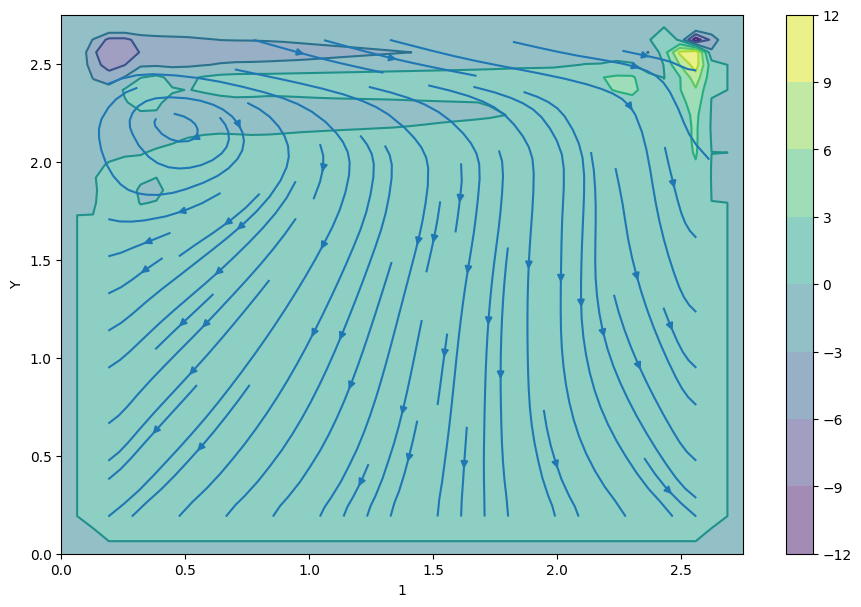

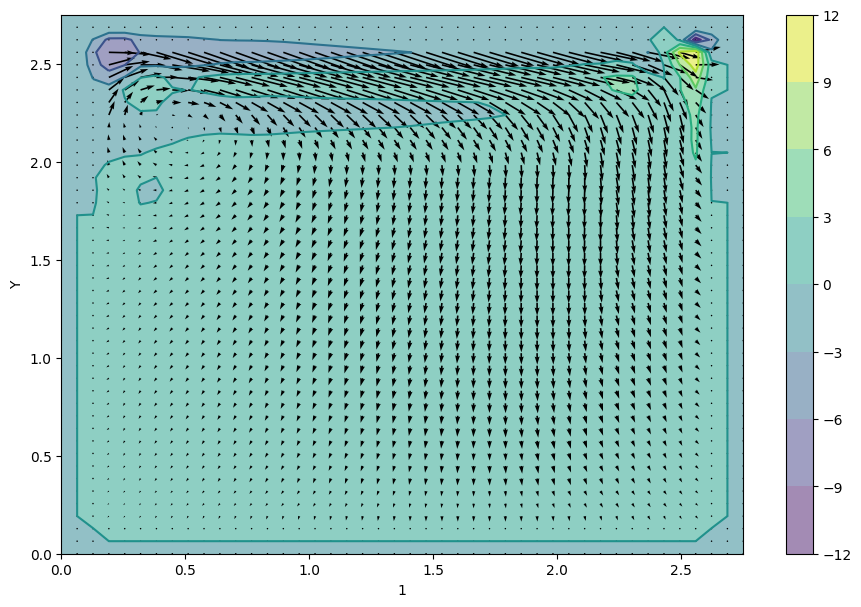

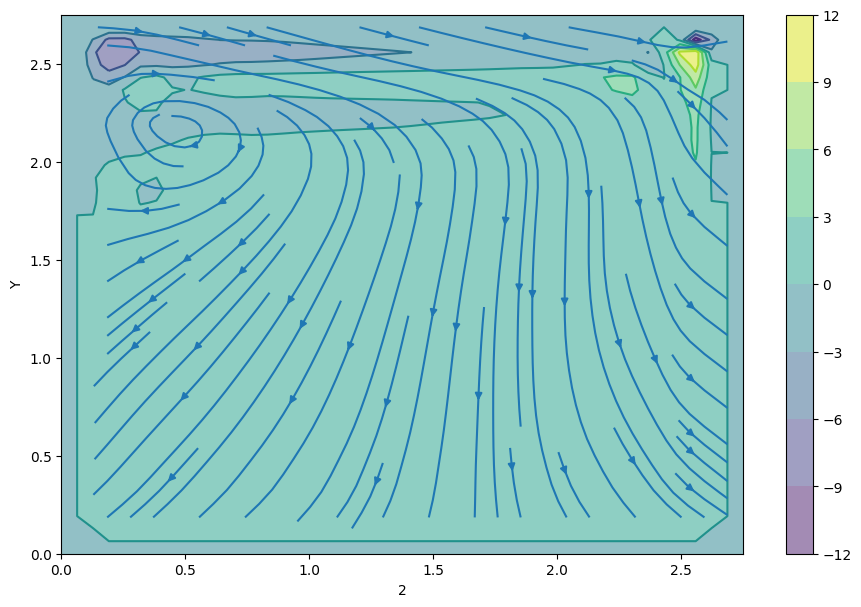

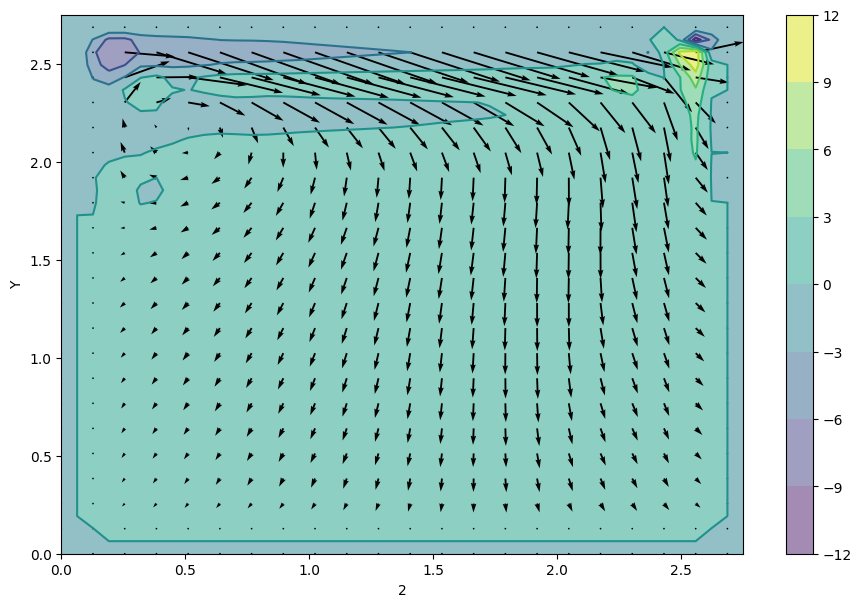

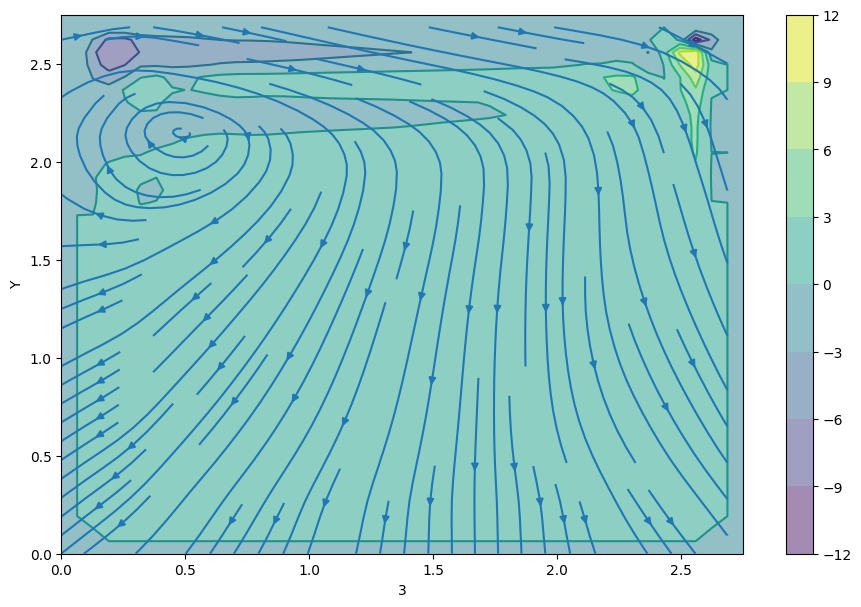

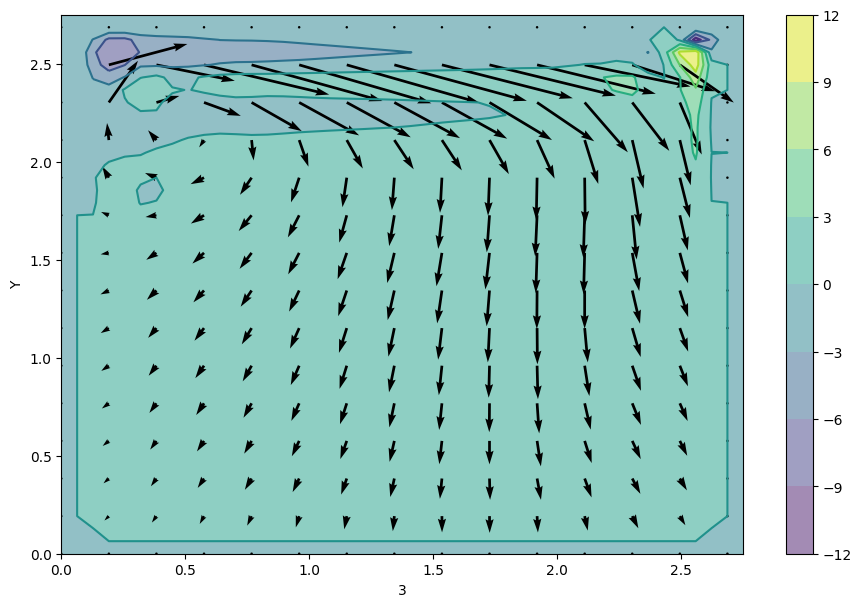

In [ ]:
# -*- coding: utf-8 -*-

'''
Created on Fri Mar  7 13:55:11 2025
Modified on Sun Mar 9 11:52:20 2025 
@author: latifa & Abeer 
'''


import math 
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import sys
from matplotlib import pyplot, cm

n=40

v = np.load('v_100_final.npy') 
v_fff = np.zeros((n+4, n+4, 2))
v_fff[3:-3,3:-3,:] = v[3:-3,3:-3,:].copy() 

p_f = np.load('p_100_final.npy') 

for i in range(1, 4):

    no_graph = i 
    no_graph_q = i
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
     
      # plotting the pressure field as a contour
    pyplot.contourf(x_0, y_0, p_f, alpha=0.5, cmap=cm.viridis)  
    pyplot.colorbar()
      # plotting the pressure field outlines
    pyplot.contour(x_0, y_0, p_f, cmap=cm.viridis)  
      # plotting velocity field
     
    pyplot.streamplot(x_0[::no_graph, ::no_graph], y_0[::no_graph, ::no_graph], v_fff[:,:,0][::no_graph, ::no_graph], v_fff[:,:,1][::no_graph, ::no_graph].copy())
     
    pyplot.xlabel(i)
    pyplot.ylabel('Y')
    
    pyplot.xlim(0, 2+ 4*dx )
    pyplot.ylim(0, 2 + 4*delta_y)
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
      # plotting the pressure field as a contour
    pyplot.contourf(x_0, y_0, p_f, alpha=0.5, cmap=cm.viridis)  
    pyplot.colorbar()
      # plotting the pressure field outlines
    pyplot.contour(x_0, y_0, p_f, cmap=cm.viridis)  
      # plotting velocity field
    pyplot.quiver(x_0[::no_graph_q, ::no_graph_q], y_0[::no_graph_q, ::no_graph_q], v_fff[:,:,0][::no_graph_q, ::no_graph_q], v_fff[:,:,1][::no_graph_q, ::no_graph_q]) 
    
    pyplot.xlabel(i)
    pyplot.ylabel('Y')
    
    pyplot.xlim(0, 2+ 4*dx )
    pyplot.ylim(0, 2 + 4*delta_y)

# sim

0
Preperation Done
Step 1 initalized


/tmp/ipykernel_724079/792930296.py:696: RuntimeWarning: divide by zero encountered in divide
  f_aj0 = k_f/beta / raj_2 * w_f.copy()
/tmp/ipykernel_724079/792930296.py:831: RuntimeWarning: divide by zero encountered in divide
  f_aj0 = k_f/beta / raj_2 * w_f.copy()


Step 1 done
Step 2 done
Step 3 done
Execution done
7.064142942428589
1
Preperation Done
Step 1 initalized


/tmp/ipykernel_724079/792930296.py:696: RuntimeWarning: divide by zero encountered in divide
  f_aj0 = k_f/beta / raj_2 * w_f.copy()
/tmp/ipykernel_724079/792930296.py:831: RuntimeWarning: divide by zero encountered in divide
  f_aj0 = k_f/beta / raj_2 * w_f.copy()


Step 1 done
Step 2 done
Step 3 done
Execution done
14.169212579727173


(0.0, 2.75)

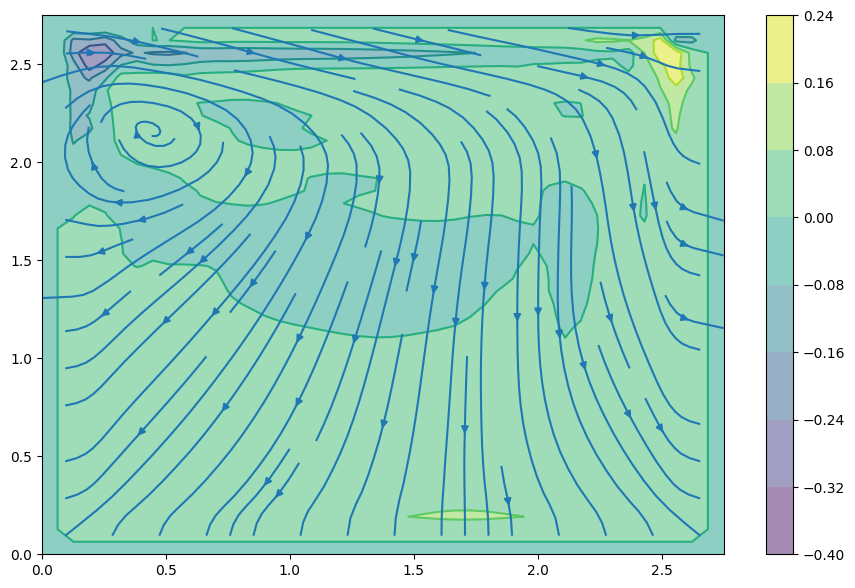

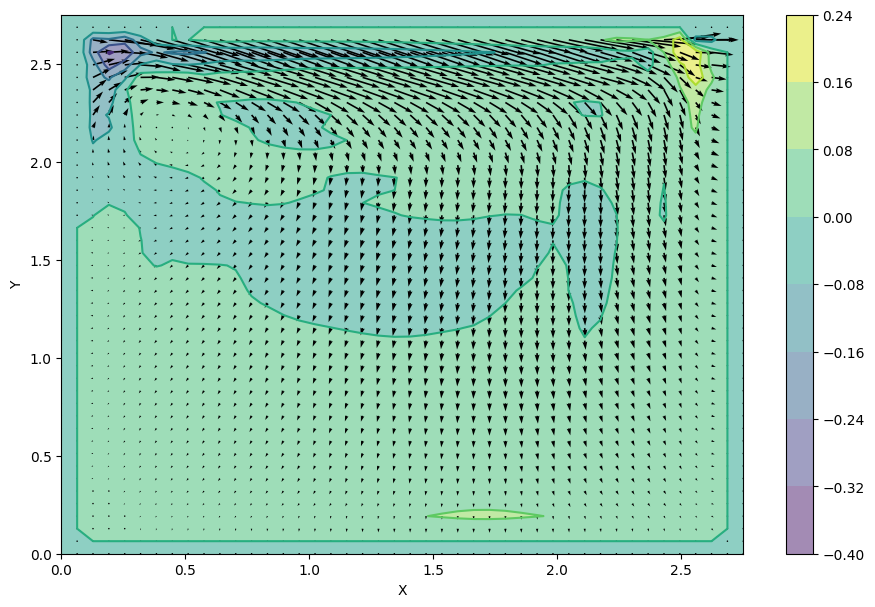

In [24]:

'''
Created on Fri Mar  7 13:55:11 2025
Modified on Sun Mar 9 11:52:20 2025 
@author: latifa & Abeer 
'''
import math 
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import sys
from matplotlib import pyplot, cm

start_time = time.time()

rho_stored = rho_0.copy()
    # the point will chng as time pass #i #j
for tick in range(2):
    
    print(tick)

    v[-3,3:-3,0] = velocity_of_lid_U

    coordinates_t = np.zeros((1,2))
    
    coordinates_t[0,:] = np.array([[coordns[0,0,0].copy(),coordns[0,0,1].copy()]])
    
    cc = 0
    
    if tick == 0:
        s_coordn = np.array([[0,0]])
    
    coordn_f = np.zeros((n+4, n+4, 2))
    
    for j in range(n+4):
            for i in range(n+4):
                if i == 0 and j == 0:
                    cc+= 1
                    continue
                coordinates_t = np.append(coordinates_t,[[coordns[i, j,0].copy(), coordns[i, j,1].copy()]], axis=0)
                if tick == 0:
                    s_coordn = np.append(s_coordn, np.array([[i,j]]), axis=0)
                    
                coordn_f[i,j,:] = coordns[i,j,:].copy()

                cc += 1
                    
    coordinates = np.zeros(((n+4)*(n+4)))
    
    coordinates = coordinates_t.copy()
    
    point = coordinates.copy()
    
    distance, indxs = distance_ij(point,coordinates,k)
    
    indx_r, indx_dictionary, dr = reassign_indxs_c(indxs, n, k, cc, s_coordn, distance) #(104, 104, 75, 2)
    
    print('Preperation Done')
    
    ############ step 1 ####################
    print('Step 1 initalized')
    r =  coordns.copy() # n+4, n+4, 2
    rj, rij = calc_rij(r,k, indx_r, indx_dictionary)
    # ! here ! ########################################################################## 
    if tick == 0:
        indx_dict, indx_f = sorter_025(n)
        
    rho_ml = rho_0.copy() 
    del_w = calc_del_Wm(rij)
    v, vj, vij = calc_vij(v[:,:,0], v[:,:,1], indx_r) # to be calc
    ######################################################################################################
    
    rho_ml_ij = calc_rho_ij(rho_ml, indx_r, f_v)
            
    p_f =  2.1730
    
    p = s_02p(rho_ml)
    
    p_n = n_vp(p, k, indx_r, n)
    
    v_star = v.copy()
    
    
    del_v_star = s_01(rij, vij,rho_ml, rho_ml_ij, p, p_n, p_f)
    
   
    w0 = calc_W00(rij, h)
    
    
    dv_dt_BCs = BCs_F00(r, rij, w0, v, vij, rho_ml, rho_ml_ij, del_w, indx_r, indx_dict)
    
    v_star[2:-2, 2:-2] += (del_v_star[2:-2,2:-2].copy())* delta_t
    
    v_star[2:-2, 2:-2] += (dv_dt_BCs[2:-2, 2:-2].copy())* delta_t

    ########### End of step 1 ###############
    
    print('Step 1 done')
    ############### step 2 ##################
    '''ri = ri_n + vi . delta t '''
    
    dr = s_02(r, v_star, delta_t)
    
    r_star = r.copy()
    
    r_star[2:-2, 2:-2] = dr[2:-2, 2:-2].copy()
    
    
    ######## end of step 2 ##################
    
    print('Step 2 done')
    
    
    ############### step 3 ##################
    
    _, rij_star, indx_r_star = coord_sorter(r_star, s_coordn)
    
    _, _, vij_star = calc_vij(v_star[:,:,0], v_star[:,:,1], indx_r_star) # to be calc

    del_w_star = calc_del_Wm(rij_star)
    
    drho = calc_rho_plus(rij_star, vij_star, del_w_star) * delta_t  
    
    rho_ml[2:-2, 2:-2] +=  drho[2:-2, 2:-2].copy() 
    
    p0 = s_02p(rho_ml)
    
    p[2:-2, 2:-2] = p0[2:-2, 2:-2]
    #############################
   
    ######## end of step 3 ##################
    
    print('Step 3 done')
    
    '''t : time | delta_t : delta time | n : time step / current step'''
    current_step +=1
    end_time = time.time()
    time_stamp = end_time - start_time
    
    print('Execution done')
    
    print(time_stamp)
    
    coordns = r_star.copy()
    v = v_star.copy()
    
    
# np.save('v_100_final_v0', v_star)
# np.save('p_100_final_p0', p)

        
no_graph = 1 #20 #14 #8

no_graph_q = 1
    
fig = pyplot.figure(figsize=(11,7), dpi=100)

# plotting the pressure field as a contour
pyplot.contourf(x_0, y_0, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(x_0, y_0, p, cmap=cm.viridis)  
# plotting velocity field
pyplot.streamplot(x_0[::no_graph, ::no_graph], y_0[::no_graph, ::no_graph], v_star[:,:,0][::no_graph, ::no_graph], v_star[:,:,1][::no_graph, ::no_graph].copy())

pyplot.xlim(0, 2 + 4*dx )
pyplot.ylim(0, 2 + 4*delta_y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(x_0, y_0, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(x_0, y_0, p, cmap=cm.viridis)  
# plotting velocity field

pyplot.quiver(x_0[::no_graph_q, ::no_graph_q], y_0[::no_graph_q, ::no_graph_q], v_star[:,:,0][::no_graph_q, ::no_graph_q], v_star[:,:,1][::no_graph_q, ::no_graph_q]) 

pyplot.xlabel('X')
pyplot.ylabel('Y')

pyplot.xlim(0, 2 + 4*dx )
pyplot.ylim(0, 2 + 4*delta_y)

   
    

# defs

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  7 13:55:11 2025
Modified on Sun Mar 9 11:52:20 2025 
@author: latifa & Abeer 
"""

import math
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
# from icv5 import h, n, k, mu, eta, mj, delta_t, fg, P_0, gamma, f_v, rho_0, c, x_0, y_0

from matplotlib import pyplot, cm

# ################# DEFs ###################
def distance_ij(point, coordinates, k):
    # Calculate pairwise distances using NearestNeighbors
    kn = k + 1
    
    nbrs = NearestNeighbors(n_neighbors=kn, algorithm='auto').fit(coordinates)
    distances, indices = nbrs.kneighbors(point)
    
    return distances, indices # n+4, k

def sorter_025(n):
    
    c_0250 = 0
    c_0251 = 0
    
    indx =  np.zeros((n+4, n+4))
    indx_f =  np.zeros((n+4)*( n+4))
    
    for j in range(n+4):
        for i in range(n+4):
           
            indx[i,j] = c_0250            
            
            if f_v[i,j] !=1:
            
                indx_f[c_0250] =  c_0251
                c_0251 += 1
                
            c_0250 += 1

            
    return indx.astype(int), indx_f.astype(int)

def reassign_indxs_c(indxs, n, k, cc, s_key0, distance):
    
    i_ndx = indxs[:, 1:].copy() 
    
    indx_rc = np.zeros((n+4, n+4, k, 2))
    
    indx_x = np.zeros((n+4, n+4, k))
    
    indx_r = np.zeros((n+4, n+4, k, 2))
    
    d_x = np.zeros((n+4, n+4, k))

    d_xx = distance.copy()
    
    c_000 = np.zeros((k+1,2))
    
    count_i = 0
    s_key = s_key0.copy()
    
    key_0 = 0
    
    key_01 = 0
    
    val = np.zeros((2))
    
    for j in range(n+4):
        for i in range(n+4):
            for l in range(k):
                
                indx_x[i,j,l] = i_ndx[key_0, l].copy()
                
                key_01 = indx_x[i,j,l].astype(int)
                
                indx_r[i,j,l,:] = s_key[key_01, :]

            key_0 += 1
                
    return indx_r.astype(int), indx_x.astype(int), d_x # 2D indicies


def calc_rij(r, k, indx_r, indx_di):
    # Calculates the neighbors' positions for each particle
    
    r_c = r.copy() # n+4, n+4, 2
    indx_rc = indx_r.copy() #(104, 104, 75)
    
    rij = np.zeros((n+4, n+4, k, 2))
    rj = np.zeros((n+4, n+4, k, 2))
    
    r_l = np.zeros((2))
    
    indx_r_l = np.zeros((2))
    
    for j in range(n+4):
        for i in range(n+4):
            for l in range(k):
            
                indx_r_l = np.array(indx_rc[i,j,l,:].copy()) # get neighbour's index
                
                r_l = np.array(r_c[indx_r_l[0].copy(), indx_r_l[1].copy(),:]) #Get neighbour's position
            
                
                rj[i,j,l,:] = np.array(r_l.copy())  #r_c[i,j,indx_rc[i,j,l,:].copy()].copy()
                
                rij[i,j,l,:] = np.array(r_c[i,j,:].copy() - rj[i,j,l,:].copy())
                
        
    return rj, rij#, indx_n

def coord_sorter(r_cccc, sss_key):
    
    r = r_cccc.copy()
    
    coordinates_t = np.zeros((1,2))
    
    coordinates_t[0,:] = np.array([[r[0,0,0].copy(), r[0,0,1].copy()]])
    
    dummy_v = np.zeros((k))
    
    cc = 0
    
    s_coordn = sss_key.copy()
    
    
    for j in range(n+4):
            for i in range(n+4):
                if i == 0 and j == 0:
                    
                    cc+= 1

                    continue
                
                coordinates_t = np.append(coordinates_t,[[r[i, j,0].copy(), r[i, j,1].copy()]], axis=0)
               
                cc += 1
         
    coordinates = coordinates_t.copy()
    
    points = coordinates.copy()

    d, indxs_rs = distance_ij(points,coordinates, k)
    
    inter_indx, _, _ = reassign_indxs_c(indxs_rs, n, k, cc, s_coordn, d)
    
    rj, rij = calc_rij(r, k, inter_indx, dummy_v )
    
    return rj, rij, inter_indx

def n_vp(vector_00, k, indx_r, n): #neighbour vectors
    # Calculates the neighbors' positions for each particle
    
    r_c = vector_00.copy() # n+4, n+4, 2
    indx_rc = indx_r.copy() #(104, 104, 75)
    
    rj = np.zeros((n+4, n+4, k))
    
    rij = np.zeros((n+4, n+4, k))

    for j in range(n+4):
        for i in range(n+4):
            for l in range(k):
                indx_r_l = indx_rc[i,j,l,:].copy()
                
                r_l = r_c[indx_r_l[0].copy(), indx_r_l[1].copy()]
                
                rj[i,j,l] = r_l.copy()  #r_c[i,j,indx_rc[i,j,l,:].copy()].copy()
                
                rij[i,j,l] = rj[i,j,l].copy()
               
    return rij 


def calc_vij(u0, v0, indx): ## here need to specify the formula for calculating vj
    v = np.zeros((n+4,n+4, 2))
    indx_v = indx.copy()
    
    v_c = v0.copy()
    u_c = u0.copy()
    
    for j in range(n+4):
        for i in range(n+4):
            
            v[i,j,:] = np.array([u_c[i,j].copy(), v_c[i,j].copy()])
            
    vij = np.zeros((n+4, n+4, k, 2))
    vj = np.zeros((n+4, n+4, k, 2))  

    u_el = np.ones((k, 2))
    
    for j in range(n+4):
        for i in range(n+4):
            
            indx_vv = indx_v[i,j,:,:].copy()
            
            for l in range(k):
            
                vj[i,j,l,:] = v[indx_vv[l,0],indx_vv[l,1]].copy()
                                # 1,1,1  
                vij[i,j,l,:] = v[i,j,:].copy() - vj[i,j,l,:].copy()
              
    return v, vj, vij



def BCs_F00(rc, rij_c, w_c, vc, vij_c, rho_ml, rho_ml_ij, del_wc, indx_r, indx_dict):
    f_aj = np.zeros((n+4, 2))
    Umax = 1
    c_s = 10* Umax
    
    k_f = 0.01*np.power(c_s,2)
    
    beta = 2 
    
    rij = rij_c.copy()
    
    v = vc.copy()
    
    w = w_c.copy()
    
    rij_norm = np.zeros((n+4, n+4, k))
    
    alpha = 1 
    
    v_sig = c_s 
    
    vij = vij_c.copy()
    
    rho = rho_ml.copy()
    
    rho_ab = rho_ml_ij.copy()
    
    pi_ab = np.zeros((n+4))
    dvdt = np.zeros((n+4, n+4, 2))
    
    indx = indx_r.copy()
    
    key_f = 1
    
    r = rc.copy()
    
    raj_v = np.zeros((n+4, 2))
    
    s = np.zeros((n+4))
    w_f = np.zeros((n+4))
    del_w = np.zeros((n+4,2))
    fa_j0 = np.zeros((n+4,2))
    fa_j = np.zeros((n+4,2))
    
    mu_ij = np.zeros((n+4))
    mu_dot = np.zeros((n+4))
    
    b_l = np.array([0, 1, -1, -2]) # boundary list
    
    b_l2 = np.array([1, 2, -2, -3])
    
    c_j = 0 
    c_i = 0
    
    indx_d = indx_dict.copy()
    
    for j in range(4):

        dvdt[b_l[j],:,:] = Bcs_ax_i(rc, vc, rho_ml, b_l[j], indx, indx_d)
        
    for i in range(4):
        
        dvdt[:,b_l[i],:] = Bcs_ax_j(rc, vc, rho_ml, b_l[i], indx, indx_d)
    dvdt[1,:,:] = - dvdt[2,:,:].copy()
    dvdt[0,:,:] = dvdt[1,:,:].copy()
    
    dvdt[-2,:,:] = - dvdt[-3,:,:].copy()
    dvdt[-1,:,:] = dvdt[-2,:,:].copy()
    
    dvdt[:,1,:] = - dvdt[:,2,:].copy()
    dvdt[:,0,:] = dvdt[:,1,:].copy()

    dvdt[:,-2,:] = - dvdt[:,-3,:].copy()
    dvdt[:,-1,:] = dvdt[:,-2,:].copy()
    
    return dvdt

def s_01(rijc,vijc,rhoc,rho_abc, pc, p_nc, p_fc):
    
    rij = rijc.copy()
    del_w = calc_del_Wm(rij)
    vij = vijc.copy()
    rho = rhoc.copy()
    rho_ab = rho_abc.copy()
    
    vis_fragments = np.zeros((2))
    L_m = 0
    
    summer = np.zeros((2))
    
    del_v_star = np.zeros((n+4, n+4, 2))
    
    term_dissipation = np.zeros((n+4, n+4, 2))
    
    p = pc.copy()
    
    p_n = p_nc.copy()
    
    f = np.zeros((k))
    
    
    Umax = 1
    
    c_s = 10* Umax
    
    k_f = 0.01*np.power(c_s,2)
    
    beta = 2 

    
    rij_norm = np.zeros((n+4, n+4, k))
    
    alpha = 1 
    
    v_sig = c_s 
    
    
    pi_ab = np.zeros((k))
    
    s = 1/1.3 # = q
    

    f_denom = 15 / 7 / math.pi / math.pow(h,2) * (2/3 - 9/8 * np.power(s,2) + 19/ 24 * np.power(s,3) - 5/32 * np.power(s,4))
    
    Ri = np.zeros((k))
    Rj = np.zeros((k))

    Rij = np.zeros((k))
    
    mu_dot = 0

    for j in range(n+4):
        for i in range(n+4):
            
           L_m = (p[i,j]/np.power(rho[i,j],2) * np.ones((k)) + p_n[i,j,:]/np.power(rho_ab[i,j,:],2))
           
           if p[i,j] < 0:
               Ri = 0.2 * np.abs(p[i,j].copy()) / np.power(rho[i,j], 2) * np.ones((k))
           else:
               Ri = 0 * np.ones((k))
               
           for l in range(k):
        
               if p_n[i,j,l] < 0:
                   
                    Rj[l] = 0.2 * np.abs(p_n[i,j,l].copy()) / np.power(rho_ab[i,j,l], 2)
                    
               else:
                   
                    Rj[l] = 0 
                
                
           s = np.linalg.norm(rij[i,j,:,:], axis=1) / h # = q
           
           for l in range(k):
          
               if (s[l] >= 0 and s[l] <= 2): # check bounds
  
                   f[l] = 15 / 7 / math.pi / math.pow(h,2) * (2/3 - 9/8 * np.power(s[l],2) + 19/ 24 * np.power(s[l],3) - 5/32 * np.power(s[l],4))
              
               else: 
                   f[l] = 0
               
           
           Rij = (Ri + Rj) * f / f_denom
           
           for l in range(k):
               
               denom = (np.power(np.linalg.norm(rij[i,j,l,:]),2) + 0.01 * np.power(h,2))
           
               mu_dot = np.dot(vij[i,j,l,:].copy(), rij[i,j,l,:].copy()) 
           
               mu_ij = h * mu_dot.copy() / denom
               
               if mu_dot < 0:
                      
                   pi_ab[l] = (- alpha * c_s * mu_ij + beta * np.power(mu_ij,2))/ ((rho[i,j].copy() + rho_ab[i,j,l].copy())/2)
               else:
                   pi_ab[l] = 0
           
           summer[0] += - np.sum((L_m.copy() + Rij.copy() + pi_ab.copy())* del_w[i,j,:,0].copy() * mj, axis=0)
           summer[1] += - np.sum((L_m.copy() + Rij.copy() + pi_ab.copy())* del_w[i,j,:,1].copy() * mj, axis=0)

           
           del_v_star[i,j,:] = summer.copy() 
           summer = summer.copy()*0
    

    
    return del_v_star



def calc_W00(vector_r,h): # vector input, 1 particle 

    # Calculate the smoothing function
    norm_rij = np.zeros((k,2))
    
    vvv = vector_r.copy()
    
    s = 0
    w = np.zeros((n+4,n+4,k))
    w_0 = 0
    
    for j in range(n+4):
        for i in range(n+4):
            for l in range(k):
    
                s = np.linalg.norm(vvv[i,j,l,:]) / h # = q
                
                if (s >= 0 and s <= 2): # check bounds
    
                    w_0 = 15 / 7 / math.pi / math.pow(h,2) * (2/3 - 9/8 * np.power(s,2) + 19/ 24 * np.power(s,3) - 5/32 * np.power(s,4))
                
                else: 
                    w_0 = 0
                
                w[i,j,l] = w_0
 
    return w


def n_v(vector_00, k, indx_r, n, f_v): #neighbour vectors
    # Calculates the neighbors' positions for each particle
    
    rho = vector_00.copy() # n+4, n+4, 2
    indx_rc = indx_r.copy() #(104, 104, 75)
    
    rhoj = np.zeros((n+4, n+4, k))
    
    rhoij = np.zeros((n+4, n+4, k))

    r_l = 0
    for j in range(n+4):
        for i in range(n+4):
            for l in range(k):
                indx_r_l = indx_rc[i,j,l,:].copy()
                
                r_l = rho[indx_r_l[0].copy(), indx_r_l[1].copy()].copy()
                
                rhoj[i,j,l] = r_l.copy()  
                rhoij[i,j,l] = rho[i,j].copy() 
                
    return rhoj #, rij


def calc_rho_ij(rho_star, indx_r_s, f_v): #to be calc # rho_star == rho_i(mj * w(ri)) summation 
    rho_i = rho_star.copy() 
    indx_rhos = indx_r_s.copy()
    
    
    rho_ij = n_v(rho_i, k, indx_rhos, n, f_v) #neighbour vectors
    
    return rho_ij  

def s_02(r, v_starc, delta_t):
    ri_0 = r.copy() # to be calculated
    ri_01 = r.copy()*0 # final result of step 2
    v_star = v_starc.copy()
    
    
    for j in range(n+4):
        for i in range(n+4):
            ri_01[i,j,:] = ri_0[i,j,:].copy() + (v_star[i,j,:].copy() * delta_t) # r is a vector r_tmp
           
    return ri_01


def calc_del_Wm(rij):
    
    # Calculate the gradient of the smoothing function
    norm_rij = np.zeros((n+4, n+4, k))
    s = 0
    Wm = np.zeros((n+4, n+4, k, 2))
    
    for j in range(n+4):
        for i in range(n+4):
            for l in range(k):
                norm_rij[i,j,l] = np.linalg.norm(rij[i,j,l,:].copy())
                s = norm_rij[i,j,l].copy() / h
                
                if (s >= 0 and s <= 2): # check bounds & functions
                    Wm[i,j,l,:] = 15 / (7 * math.pi * h**4) * (-9 / 4 + 19 / 8 * s - 5 / 8 * s**2) * rij[i,j,l,:].copy()
                else:
                    Wm[i,j,l,:] = np.zeros_like(rij[i,j,l,:].copy())       
    
    return Wm




def Bcs_ax(rc, vc, rho_ml, c_i, c_j):
    
    f_aj = np.zeros((n+4, 2))
    
    Umax = 1
    
    c_s = 10* Umax
    
    k_f = 0.01*np.power(c_s,2)
    
    beta = 2 
        
    
    rij_norm = np.zeros((n+4, n+4, k))
    
    alpha = 1 
    
    v_sig = c_s 
    
    v = vc.copy()
    
    
    rho = rho_ml.copy()
    
    
    pi_ab = np.zeros((n+4))
    
    dvdt = np.zeros((n+4, n+4, 2))
    
    
    key_f = 1
    
    r = rc.copy()
    
    raj_v = np.zeros((n+4, 2))
    
    s = np.zeros((n+4))
    w_f = np.zeros((n+4))
    del_w = np.zeros((n+4,2))
    fa_j0 = np.zeros((n+4,2))
    fa_j = np.zeros((n+4,2))
    
    mu_ij = np.zeros((n+4))
    mu_dot = np.zeros((n+4))
    
    cc_i = c_i
    
    cc_j = c_j

    
    for j in range(n+4):
        for i in range(n+4):
            
            
            if f_v[i,j] == 1:
                continue
        
            dy = (r[i,j,1].copy()* np.ones((n+4)) - r[c_i,:,1].copy())
            
            dx = (r[i,j,0].copy()* np.ones((n+4)) - r[c_i,:,0].copy())
            
            raj_v[:,0] = dx.copy()
            
            raj_v[:,1] = dy.copy()
            
            raj_2 = np.power(np.linalg.norm(raj_v.copy(), axis=1), 2)
            
            
            s = np.linalg.norm(raj_v.copy(), axis=1) / h # = q
            
            for l in range(n+4):
            
                if (s[l] >= 0 and s[l] <= 2): # check bounds
    
                    w_f[l] = 15 / 7 / math.pi / math.pow(h,2) * (2/3 - 9/8 * np.power(s[l],2) + 19/ 24 * np.power(s[l],3) - 5/32 * np.power(s[l],4))
                
                else: 
                    w_f[l] = 0
                    
            
            f_aj0 = k_f/beta / raj_2 * w_f.copy()   
            
            fa_j = fa_j0 * raj_v.copy()
            
            vij = (v[i,j,:].copy()* np.ones((n+4,2)) - v[c_i,:,:].copy()) # n+4, 2
                          
            
            for l in range(n+4):
            
                mu_dot[l] = np.dot(vij[l,:].copy(), raj_v[l,:].copy())
            
            mu_ij = h * mu_dot.copy() / (np.power(np.linalg.norm(raj_v.copy(), axis=1),2) + 0.01 * np.power(h,2))

            dot_cond = mu_dot.copy()
            
            
            for l in range(n+4):
            
                if dot_cond[l] < 0:
                       
                    pi_ab[l] = (- alpha * c_s * mu_ij[l] + beta * np.power(mu_ij[l],2))/ ((rho[i,j].copy() + rho[0,l].copy())/2)
                else:
                    pi_ab[l] = 0
                
                
            for l in range(n+4):
            
                if (s[l] >= 0 and s[l] <= 2): # check bounds & functions
                    del_w[l,:] = 15 / (7 * math.pi * h**4) * (-9 / 4 + 19 / 8 * s[l] - 5 / 8 * s[l]**2) * raj_v[l,:].copy()
                else:
                    del_w[l,:] = raj_v[l,:].copy() * 0
            
            dvdt[c_i,:,0] += key_f * f_aj[:,0].copy() - mj * pi_ab.copy() * del_w[:,0].copy() 
         
            dvdt[c_i,:,1] += key_f * f_aj[:,1].copy() - mj * pi_ab.copy() * del_w[:,1].copy() 
   
    
    return dvdt

def Bcs_ax_i(rc, vc, rho_ml, c_i, indx_r, indx_dict):
    
    f_aj = np.zeros((n+4, 2))
    
    Umax = 1
    
    c_s = 10* Umax
    
    k_f = 0.01*np.power(c_s,2)
    
    beta = 2 
        
    
    rij_norm = np.zeros((n+4, n+4, k))
    
    alpha = 1 
    
    v_sig = c_s 
    
    v = vc.copy()
    
    
    rho = rho_ml.copy()
    
    
    pi_ab = np.zeros((n+4))
    
    dvdt = np.zeros((n+4, n+4, 2))
    
    
    key_f = 1
    
    r = rc.copy()
    
    raj_v = np.zeros((n+4, 2))
    
    s = np.zeros((n+4))
    w_f = np.zeros((n+4))
    del_w = np.zeros((n+4,2))
    fa_j0 = np.zeros((n+4,2))
    fa_j = np.zeros((n+4,2))
    
    mu_ij = np.zeros((n+4))
    mu_dot = np.zeros((n+4))
    
    cc_i = c_i
    
    indx = indx_r.copy()
    indx_d = indx_dict.copy()
    
    for j in range(n+4):
  
        dy = (r[cc_i,j,1].copy()* np.ones((n+4)) - r[cc_i,:,1].copy())
        
        dx = (r[cc_i,j,0].copy()* np.ones((n+4)) - r[cc_i,:,0].copy())
        
        raj_v[:,0] = dx.copy()
        
        raj_v[:,1] = dy.copy()
        
        raj_2 = np.power(np.linalg.norm(raj_v.copy(), axis=1), 2)
        
        s = np.linalg.norm(raj_v.copy(), axis=1) / h # = q
        
        for l in range(n+4):
        
            if (s[l] >= 0 and s[l] <= 2): # check bounds
    
                w_f[l] = 15 / 7 / math.pi / math.pow(h,2) * (2/3 - 9/8 * np.power(s[l],2) + 19/ 24 * np.power(s[l],3) - 5/32 * np.power(s[l],4))
            
            else: 
                w_f[l] = 0
                
        f_aj0 = k_f/beta / raj_2 * w_f.copy()   
        
        fa_j = fa_j0 * raj_v.copy()
        
        vij = (v[cc_i,j,:].copy()* np.ones((n+4,2)) - v[cc_i,:,:].copy()) # n+4, 2
                      
        
        for l in range(n+4):
        
            mu_dot[l] = np.dot(vij[l,:].copy(), raj_v[l,:].copy())
        
        mu_ij = h * mu_dot.copy() / (np.power(np.linalg.norm(raj_v.copy(), axis=1),2) + 0.01 * np.power(h,2))
    
        dot_cond = mu_dot.copy()
        
        
        for l in range(n+4):
        
            if dot_cond[l] < 0:
                   
                pi_ab[l] = (- alpha * c_s * mu_ij[l] + beta * np.power(mu_ij[l],2))/ ((rho[cc_i,j].copy() + rho[cc_i,l].copy())/2)
            else:
                pi_ab[l] = 0
            
            
        for l in range(n+4):
        
            if (s[l] >= 0 and s[l] <= 2): # check bounds & functions
                del_w[l,:] = 15 / (7 * math.pi * h**4) * (-9 / 4 + 19 / 8 * s[l] - 5 / 8 * s[l]**2) * raj_v[l,:].copy()
            else:
                del_w[l,:] = raj_v[l,:].copy() * 0
                
                
        dvdt_plus_0 = key_f * f_aj[:,0].copy() - mj * pi_ab.copy() * del_w[:,0].copy() 
         
        dvdt_plus_1 = key_f * f_aj[:,1].copy() - mj * pi_ab.copy() * del_w[:,1].copy() 
         
         
         
        vvv = f_v[indx[cc_i,j,:,0], indx[cc_i,j,:,1]]
         
        if np.any(vvv.copy()) == True:
             key0 = np.array(np.where(vvv.copy() == True))
             
             for q in range(len(key0)):
         
                 key = np.where(indx_d == key0[0,q])
                 
                 if key[0] == cc_i and key[1] == j:
                     dvdt_plus_0[key[0]] = 0
                     dvdt_plus_1[key[1]] = 0
                 
                 else:
                     dvdt_plus_0[key[0]] = - dvdt_plus_0[key[0]]
                     dvdt_plus_1[key[1]] = - dvdt_plus_1[key[1]]
                 
        dvdt[cc_i,:,0] += dvdt_plus_0.copy()
      
        dvdt[cc_i,:,1] += dvdt_plus_1.copy()
          
    return dvdt[cc_i,:,:]

def Bcs_ax_j(rc, vc, rho_ml, c_j, indx_r, indx_dict):
    
    f_aj = np.zeros((n+4, 2))
    
    Umax = 1
    
    c_s = 10* Umax
    
    k_f = 0.01*np.power(c_s,2)
    
    beta = 2 
        
    rij_norm = np.zeros((n+4, n+4, k))
    
    alpha = 1 
    
    v_sig = c_s 
    
    v = vc.copy()
    
    
    rho = rho_ml.copy()
    
    
    pi_ab = np.zeros((n+4))
    
    dvdt = np.zeros((n+4, n+4, 2))
    
    
    key_f = 1
    
    r = rc.copy()
    
    raj_v = np.zeros((n+4, 2))
    
    s = np.zeros((n+4))
    w_f = np.zeros((n+4))
    del_w = np.zeros((n+4,2))
    fa_j0 = np.zeros((n+4,2))
    fa_j = np.zeros((n+4,2))
    
    mu_ij = np.zeros((n+4))
    mu_dot = np.zeros((n+4))
    
    indx = indx_r.copy()
    indx_d = indx_dict.copy()
    
    cc_j = c_j

    for i in range(n+4):
          
        dy = (r[i,cc_j,1].copy()* np.ones((n+4)) - r[:, cc_j,1].copy())
        
        dx = (r[i,cc_j,0].copy()* np.ones((n+4)) - r[:, cc_j,0].copy())
        
        raj_v[:,0] = dx.copy()
        
        raj_v[:,1] = dy.copy()
        
        raj_2 = np.power(np.linalg.norm(raj_v.copy(), axis=1), 2)
        
        s = np.linalg.norm(raj_v.copy(), axis=1) / h # = q
        
        for l in range(n+4):
        
            if (s[l] >= 0 and s[l] <= 2): # check bounds
    
                w_f[l] = 15 / 7 / math.pi / math.pow(h,2) * (2/3 - 9/8 * np.power(s[l],2) + 19/ 24 * np.power(s[l],3) - 5/32 * np.power(s[l],4))
            
            else: 
                w_f[l] = 0
                
        
        f_aj0 = k_f/beta / raj_2 * w_f.copy()   
        
        fa_j = fa_j0 * raj_v.copy()
        
        vij = (v[i,cc_j,:].copy()* np.ones((n+4,2)) - v[:,cc_j,:].copy()) # n+4, 2
                      
        
        for l in range(n+4):
        
            mu_dot[l] = np.dot(vij[l,:].copy(), raj_v[l,:].copy())
        
        mu_ij = h * mu_dot.copy() / (np.power(np.linalg.norm(raj_v.copy(), axis=1),2) + 0.01 * np.power(h,2))
        
        dot_cond = mu_dot.copy()
        
        
        for l in range(n+4):
        
            if dot_cond[l] < 0:
                   
                pi_ab[l] = (- alpha * c_s * mu_ij[l] + beta * np.power(mu_ij[l],2))/ ((rho[i,cc_j].copy() + rho[i,l].copy())/2)
            else:
                pi_ab[l] = 0
            
        for l in range(n+4):
        
            if (s[l] >= 0 and s[l] <= 2): # check bounds & functions
                del_w[l,:] = 15 / (7 * math.pi * h**4) * (-9 / 4 + 19 / 8 * s[l] - 5 / 8 * s[l]**2) * raj_v[l,:].copy()
            else:
                del_w[l,:] = raj_v[l,:].copy() * 0
        
        vvv = f_v[indx[i,cc_j,:,0], indx[i,cc_j,:,1]]
        
        dvdt_plus_0 = key_f * f_aj[:,0].copy() - mj * pi_ab.copy() * del_w[:,0].copy() 
        
        dvdt_plus_1 = key_f * f_aj[:,1].copy() - mj * pi_ab.copy() * del_w[:,1].copy() 
        
        
        if np.any(vvv.copy()) == True:
            key0 = np.array(np.where(vvv.copy() == True))
            
            for q in range(len(key0)):
        
                key = np.where(indx_d == key0[0,q])
                
                if key[0] == i and key[1] == cc_j:
                    dvdt_plus_0[key[0]] = 0
                    dvdt_plus_1[key[1]] = 0
                
                else:
                    dvdt_plus_0[key[0]] = - dvdt_plus_0[key[0]]
                    dvdt_plus_1[key[1]] = - dvdt_plus_1[key[1]]
                
        dvdt[:,cc_j,0] += dvdt_plus_0.copy()
     
        dvdt[:,cc_j,1] += dvdt_plus_1.copy()
        
    return dvdt[:,cc_j,:]



def s_02p(rhoc):
    
    rho = rhoc.copy()
    
    p = np.zeros((n+4,n+4))
    
    for j in range(n+4):
        for i in range(n+4):
            p[i,j] = rho_0[i,j] * np.power(c,2) / gamma * (np.power((rho[i,j]/rho_0[i,j]), gamma) - 1)
    
    return p

def calc_rho_plus(rij_sp, vij_sp, del_wc):
    
    rho = np.zeros((n+4,n+4))
    rij = rij_sp.copy()
    del_w = del_wc.copy() 
    vij = vij_sp.copy()

    
    for j in range(n+4):
        for i in range(n+4):
            for l in range(k):
            
                rho[i,j] += mj*np.dot(vij[i,j,l,:].copy(),del_w[i,j,l,:].copy())
   
    return rho

def plotter(v,p, dx, delta_y, s_n, s_q):
    
    no_graph = s_n #20 #14 #8

    no_graph_q = s_q
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)

    # plotting the pressure field as a contour
    pyplot.contourf(x_0, y_0, p, alpha=0.5, cmap=cm.viridis)  
    pyplot.colorbar()
    # plotting the pressure field outlines
    pyplot.contour(x_0, y_0, p, cmap=cm.viridis)  
    # plotting velocity field
    
    pyplot.streamplot(x_0[::no_graph, ::no_graph], y_0[::no_graph, ::no_graph], v[:,:,0][::no_graph, ::no_graph], v[:,:,1][::no_graph, ::no_graph].copy())

    pyplot.xlim(0, 2 + 4*dx )
    pyplot.ylim(0, 2 + 4*delta_y)
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    # plotting the pressure field as a contour
    pyplot.contourf(x_0, y_0, p, alpha=0.5, cmap=cm.viridis)  
    pyplot.colorbar()
    # plotting the pressure field outlines
    pyplot.contour(x_0, y_0, p, cmap=cm.viridis)  
    # plotting velocity field
    # fig = pyplot.figure(figsize=(11,7), dpi=100)

    pyplot.quiver(x_0[::no_graph_q, ::no_graph_q], y_0[::no_graph_q, ::no_graph_q], v[:,:,0][::no_graph_q, ::no_graph_q], v[:,:,1][::no_graph_q, ::no_graph_q]) 

    # pyplot.quiver(ri_n_1[:,:,0][::2, ::2], ri_n_1[:,:,1][::2, ::2], vi_n_1[:,:,0][::2, ::2], vi_n_1[:,:,0][::2, ::2]) 
    pyplot.xlabel('X')
    pyplot.ylabel('Y')

    pyplot.xlim(0, 2 + 4*dx )
    pyplot.ylim(0, 2 + 4*delta_y)
    
    return 
############ End of DEF #################
